# Mar 2024

> Use NLP to sort the entries in the 'Other Interests' column into categories.

In [16]:
# First, let's load the data and inspect the first few rows
import pandas as pd

data = pd.read_csv('cleaned2.csv')

# Create the new columns

keywords = {
    'Archaeology/Anthropology': ['archaeology', 'anthropology'],
    'Religious Studies': ['religion', 'religious', 'theology', 'biblic'],
    'Family History': ['family', 'ancestors', 'genealogy', 'parent', 'sister', 'brother', 'home children'],
    'Local History': ['local', 'railway', 'community'],
    'Philosophy' : ['philosophy'],
    'Social Studies': ['social', 'society', 'studies', 'ethnic', 'humanities', 'sexuality', 'youth', 'equality'],
    'Social Science': ['psychotherapy'],
    'Music': ['music'],
    'Science': ['engineering', 'physics', 'chemistry', 'biology', 'mechanical', 'civil', 'architecture'],
    'Military': ['military'],
    'Police': ['rcmp', 'police'],
    'Art': ['art','arts','craft']
}
for category, words in keywords.items():
    for word in words:
        data[category] = data['Other Interest'].str.contains(word, case=False, na=False)

# Convert boolean to int
for category in keywords.keys():
    data[category] = data[category].astype(int)

# Drop the 'Other Interest' column
data = data.drop(columns=['Other Interest'])


Now, the data is ready for further analysis or modeling with a more structured representation of the interests.

> Use NLP to sort the entries in the 'Other Identifiers' column into categories.

In [17]:
# First, we need to replace the 'Other Identifications' entries with the respective categories.
# I'll follow the similar text matching approach explained before:

# I'll create a keyword mapping to categories
identifiers_keywords = {
    'Retired': ['retired'],
    'Historical Society': ['historical society'],
    'Independent Researcher': ['independant', 'independent'],
    'Scholar': ['scholar'],
    'Editor': ['editor'],
    'Writer': ['writer'],
    'Historian': ['historian'],
    'Journalist': ['journalist'],
    'Researcher': ['researcher', 'research'],
    'Cinematographer': ['cinematographer','youtuber'],
    'Enthusiast' : ['enthusiast', 'amateur'],
    'Law Officer' : ['rcmp','police']
}

# Create the new columns for each category
for identifier, words in identifiers_keywords.items():
    for word in words:
        data[identifier] = data['Other Identification'].str.contains(word, case=False, na=False)

# Convert boolean to int
for identifier in identifiers_keywords.keys():
    data[identifier] = data[identifier].astype(int)

# Drop the 'Other Identification' column
data = data.drop(columns=['Other Identification'])

Now, the dataframe is adjusted for further processing or modeling. The 'Other Identifiers' is now broken down to specific categories which should be more insightful and manageable for analysis.

> Determine the columns that have to do with occupations and the columns that have to do with interests

In [18]:
occupations_columns = [
    'Genealogical researcher', 
    'GLAM professional', 
    'Government employee', 
    'Legal researcher', 
    'Member of the general public', 
    'Post-secondary researcher', 
    'Student', 
    'Teacher', 
    'Retired',
    'Historical Society',
    'Independent Researcher',
    'Scholar',
    'Editor',
    'Writer',
    'Historian',
    'Journalist',
    'Cinematographer',
    'Enthusiast',
    'Researcher',
    'Law Officer'
]



interests_columns = [
    'Computer Science',
    'Digital Humanities',	
    'Education',	
    'Environment/Climate',
    'Gender Studies',
    'Genealogy',
    'Geography',
    'Health',
    'History',
    'Indigenous Land Claims',
    'Indigenous Studies',
    'Information Science',
    'Law',
    'Linguistics',
    'Literature',
    'Political Science',
    'Archaeology/Anthropology',
    'Religious Studies',
    'Family History',
    'Local History',
    'Social Studies',
    'Social Science',
    'Philosophy',
    'Music',
    'Science',
    'Art',
    'Police',
    'Military'
]

occupations_columns.sort()

interests_columns.sort()

> Create a bar chart showing the count of the different occupations

In [19]:
# The first step is to get the count of each occupation. 
# The occupations_columns contains the names of the occupation columns in the dataset.
occupation_counts = data[occupations_columns].sum()

occupation_counts.sort_values(ascending=False)

Genealogical researcher         2293
Member of the general public    1993
Student                         1216
Post-secondary researcher        655
GLAM professional                276
Teacher                          269
Government employee              184
Legal researcher                 171
Retired                          117
Researcher                       112
Historian                         70
Writer                            34
Independent Researcher            18
Historical Society                11
Enthusiast                        10
Editor                             8
Journalist                         8
Scholar                            3
Cinematographer                    2
Law Officer                        2
dtype: int64

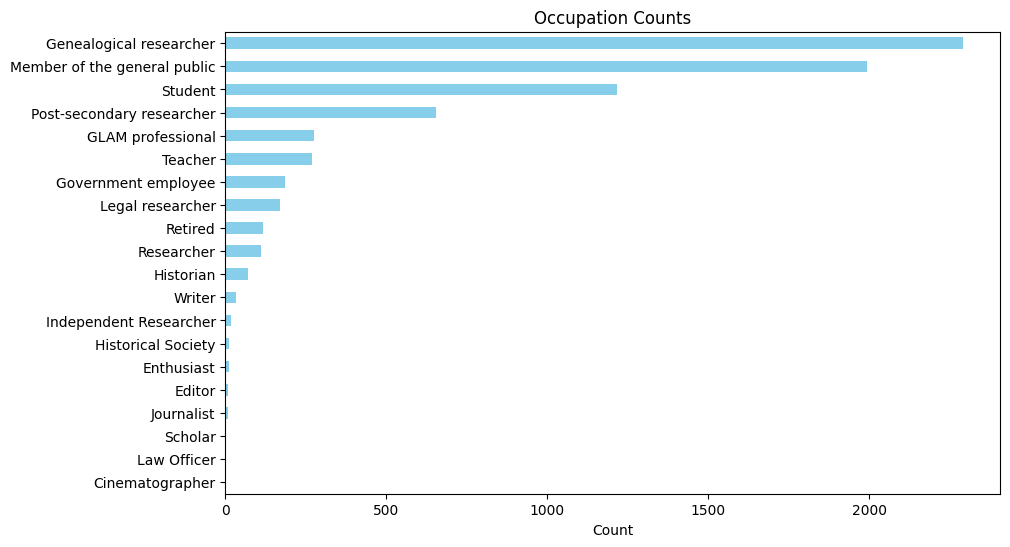

In [20]:
# Now, let's plot a bar chart of the occupation counts
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6)) 
occupation_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Occupation Counts')
plt.show()

> Create a bar chart showing the count of the different interests

In [21]:
# The first step is to get the count of each interest. 
# The interests_columns contains the names of the interests columns in the dataset.
interest_counts = data[interests_columns].sum()

interest_counts.sort_values(ascending=False)

History                     3259
Genealogy                   2499
Indigenous Studies           678
Geography                    503
Law                          421
Education                    413
Indigenous Land Claims       367
Literature                   336
Political Science            318
Digital Humanities           314
Environment/Climate          283
Health                       208
Gender Studies               176
Information Science          158
Linguistics                  147
Computer Science             140
Science                       15
Military                      12
Archaeology/Anthropology      11
Music                          8
Art                            5
Local History                  4
Philosophy                     4
Family History                 4
Social Studies                 2
Religious Studies              1
Social Science                 1
Police                         0
dtype: int64

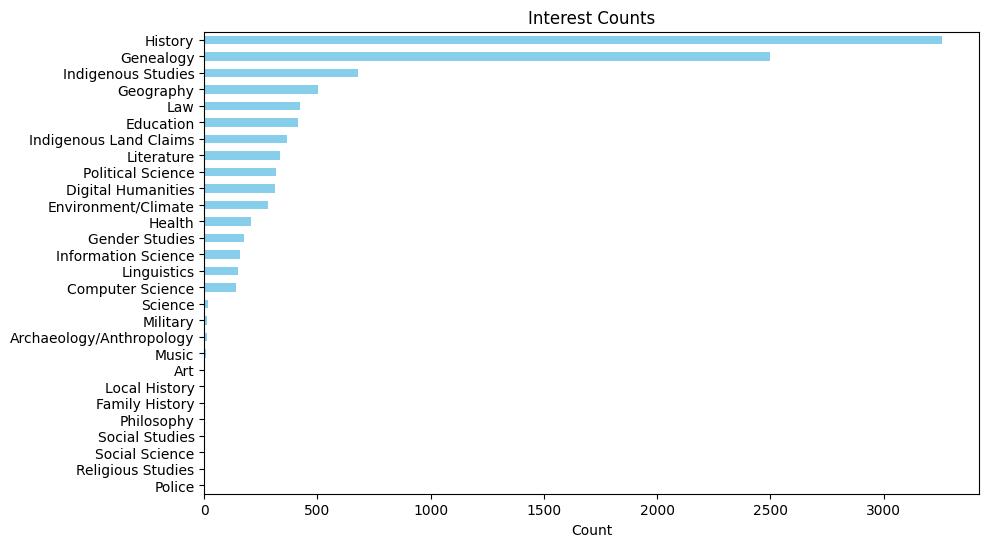

In [22]:
# Now, let's plot a bar chart of the interest counts

plt.figure(figsize=(10,6)) 
interest_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Interest Counts')
plt.show()

> plot the entire dataset of people on a map displaying the counts per city

In [23]:
# Now, let's group the data by city and get the count of people in each city
people_counts = data.groupby(['city', 'latitude', 'longitude']).size().reset_index(name='counts')
people_counts

,city,latitude,longitude,counts
0,100 Mile House,51.6498,-121.2859,1
1,Aalborg,57.0480,9.9187,2
2,Abbotsford,49.0580,-122.2526,16
3,Abbotsford,49.0754,-122.1780,2
4,Aberdeen,57.1437,-2.0981,1
...,...,...,...,...
1379,Zagreb,45.8144,15.9780,1
1380,Zapopan,20.7236,-103.3848,1
1381,Zoetermeer,52.0575,4.4931,1
1382,Zwolle,52.5125,6.0944,1


In [24]:
# Import the folium package
import folium

# Create an initial map, we are going to start with a blank map centered around (0,0)
m = folium.Map(location=[0, 0], zoom_start=1)

# Using folium.Circle, add a cirle for each city in people_counts DataFrame
# The size of the circle corresponds to the count of people in the city
for _, row in people_counts.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=float(row['counts']) * 1000,  # Multiply by 1000 to make the circles visible
        fill=True,
        tooltip=f"{row['city']}: {row['counts']} people"
    ).add_to(m)

# Display the map
m

> what are the most common interests for each occupation in the dataset

In [25]:
# For each occupation, let's find out the most common interest
occupation_interests = {}

for occupation in occupations_columns:
    # Calculate the sum of people with this occupation having each interest
    coi = data[data[occupation] == 1][interests_columns].sum()
    # Find the most common interest
    most_common_interest = coi.idxmax()
    occupation_interests[occupation] = most_common_interest

occupation_interests

{'Cinematographer': 'History',
 'Editor': 'History',
 'Enthusiast': 'History',
 'GLAM professional': 'History',
 'Genealogical researcher': 'Genealogy',
 'Government employee': 'History',
 'Historian': 'History',
 'Historical Society': 'History',
 'Independent Researcher': 'History',
 'Journalist': 'History',
 'Law Officer': 'Computer Science',
 'Legal researcher': 'Law',
 'Member of the general public': 'History',
 'Post-secondary researcher': 'History',
 'Researcher': 'History',
 'Retired': 'History',
 'Scholar': 'History',
 'Student': 'History',
 'Teacher': 'History',
 'Writer': 'History'}

> plot the count of all interests for all occupations on a heat map

In [26]:
# First, we need to recreate the relevant segments of the dataframe for occupations and interests
occupations_data = data[occupations_columns]
interests_data = data[interests_columns]

# Count the occurrences of interests for each occupation
occupation_interest_counts = {}
for occupation in occupations_columns:
    occupation_data = data[data[occupation] == 1]
    for interest in interests_columns:
        if occupation in occupation_interest_counts:
            occupation_interest_counts[occupation][interest] = occupation_data[interest].sum()
        else:
            occupation_interest_counts[occupation] = {interest: occupation_data[interest].sum()}

# Convert the dictionary to a pandas DataFrame
occupation_interest_df = pd.DataFrame.from_dict(occupation_interest_counts, orient='index')

# Show the dataframe
occupation_interest_df

,Archaeology/Anthropology,Art,Computer Science,Digital Humanities,Education,Environment/Climate,Family History,Gender Studies,Genealogy,Geography,...,Local History,Military,Music,Philosophy,Police,Political Science,Religious Studies,Science,Social Science,Social Studies
Cinematographer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Editor,0,0,0,6,2,2,0,2,2,2,...,0,0,0,0,0,1,0,0,0,0
Enthusiast,0,0,0,0,0,1,0,0,3,1,...,0,1,0,0,0,1,0,0,0,0
GLAM professional,0,0,11,47,27,19,0,25,59,21,...,1,0,1,0,0,20,0,0,0,0
Genealogical researcher,1,0,31,75,68,39,3,24,1806,175,...,1,6,0,0,0,53,0,0,0,0
Government employee,0,0,9,20,16,16,0,11,40,25,...,0,0,0,0,0,24,0,1,0,0
Historian,0,0,2,8,3,2,0,1,14,8,...,0,1,0,0,0,4,0,0,0,0
Historical Society,0,0,0,1,1,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0
Independent Researcher,0,0,0,4,1,3,0,0,4,3,...,0,0,0,0,0,2,0,0,0,0
Journalist,0,0,0,0,1,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


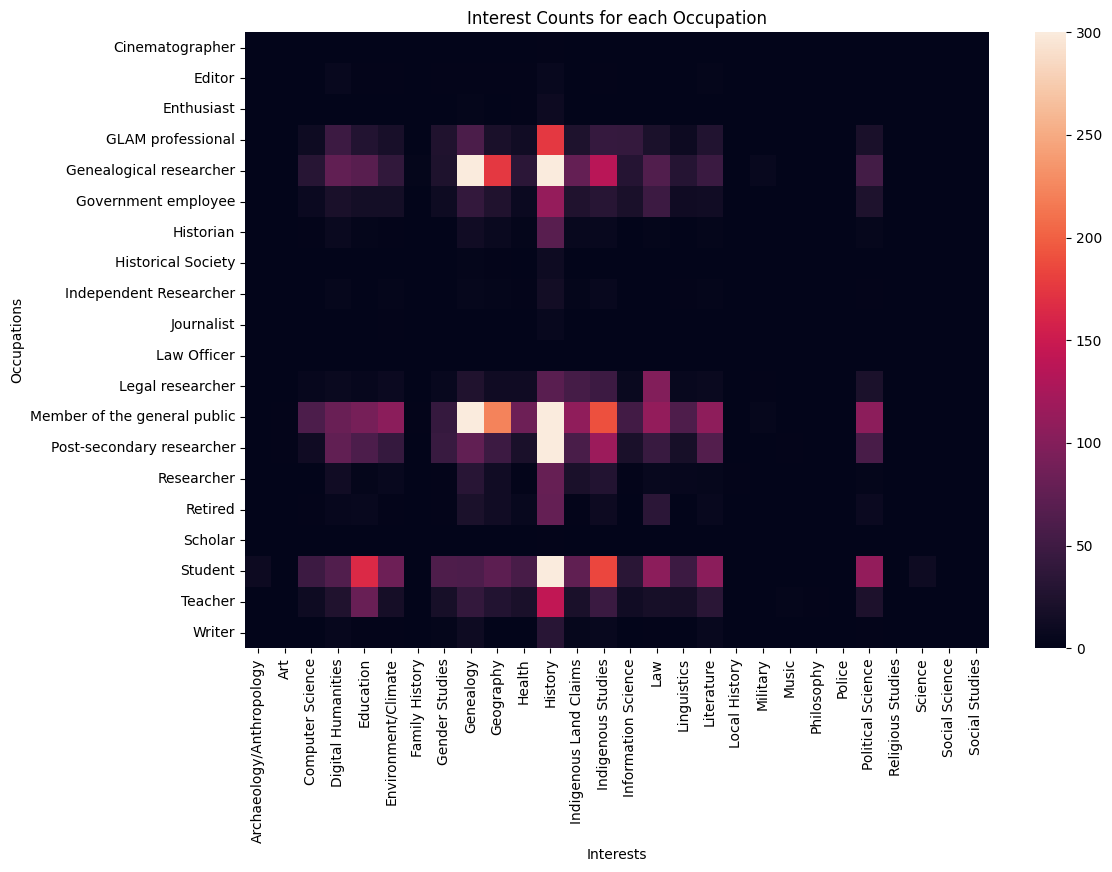

In [27]:
# Now, we will plot a heat map using the seaborn library
import seaborn as sns

# Increase the size of the figure for better visibility
plt.figure(figsize=(12,8))

# Plot the heatmap
sns.heatmap(occupation_interest_df, annot=False, vmin=0, vmax=300)

# Set the labels and title for the plot
plt.xlabel('Interests')
plt.ylabel('Occupations')
plt.title('Interest Counts for each Occupation')

# Show the plot
plt.show()

Now we have a heatmap that shows the count of all interests for all occupations.

Some insights:

1. 'Genealogical researchers' show a high count for 'Genealogy' (indicated by the light colored cell).
2. 'Students' show a high count for 'History' and a moderate count for 'Education' (indicated by the color gradient of the corresponding cells).

This heatmap provides a useful visual summary to understand the distribution of various interests across different occupations.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78bfc222-b866-4a43-b8a8-c2a8d5467ce5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>